# MTG Analysis: Cleaning the data to be used

In [636]:
# import analytics tool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [637]:
# import ML tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [638]:
# import card data
cards_df = pd.read_csv('data_files/cards.csv')
cards_df.head(5)


/var/folders/tm/jmhp8xvj4_d4hh_01cf1jt_r0000gn/T/ipykernel_97025/3623479123.py:2: DtypeWarning: Columns (3,7,12,16,20,23,25,26,30,31,32,33,35,39,40,41,47,52,53,61,62,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  cards_df = pd.read_csv('data_files/cards.csv')


,artist,artistIds,asciiName,attractionLights,availability,boosterTypes,borderColor,cardParts,colorIdentity,colorIndicator,...,subsets,subtypes,supertypes,text,toughness,type,types,uuid,variations,watermark
0,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN
1,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,NaN
2,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN
3,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,NaN
4,Mark Zug,48e2b98c-5467-4671-bd42-4c3746115117,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,NaN,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,c5655330-5131-5f40-9d3e-0549d88c6e9e,NaN


In [639]:
# list all columns
cards_df.columns.to_list()[0:5]


['artist', 'artistIds', 'asciiName', 'attractionLights', 'availability']

In [640]:
# Trim down the columns
cards_df = cards_df[['name', 'types', 'colors','power',
          'toughness', 'manaCost','manaValue', 'rarity',  'setCode', 'uuid']]


In [641]:
# import price data
price_df = pd.read_csv('data_files/cardPrices.csv')
price_df.head(5)


,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing,uuid
0,normal,USD,2023-10-22,mtgo,0.07,cardhoarder,retail,f182e364-0439-5594-a6e6-75f7889ccf45
1,normal,USD,2023-10-22,mtgo,0.23,cardhoarder,retail,330deaa3-dd7a-52a8-bfbc-b323cd16a409
2,normal,USD,2023-10-22,mtgo,0.02,cardhoarder,retail,79e36956-b91f-580f-8309-7d9585a67560
3,normal,USD,2023-10-22,mtgo,0.15,cardhoarder,retail,6afb2b4c-530a-57d5-8e7f-871239f6fa05
4,normal,USD,2023-10-22,mtgo,0.02,cardhoarder,retail,b1fc2762-92aa-5a14-8509-a59cb611e376


In [642]:
price_df.columns.to_list()


['cardFinish',
 'currency',
 'date',
 'gameAvailability',
 'price',
 'priceProvider',
 'providerListing',
 'uuid']

In [643]:
# Import set data
set_df = pd.read_csv('data_files/sets.csv')
set_df.head(5)


,baseSetSize,block,cardsphereSetId,code,isFoilOnly,isForeignOnly,isNonFoilOnly,isOnlineOnly,isPartialPreview,keyruneCode,...,mcmIdExtras,mcmName,mtgoCode,name,parentCode,releaseDate,tcgplayerGroupId,tokenSetCode,totalSetSize,type
0,383,Core Set,755.0,10E,False,NaN,NaN,False,NaN,10E,...,NaN,Tenth Edition,10E,Tenth Edition,NaN,2007-07-13,1.0,T10E,510,core
1,302,Core Set,938.0,2ED,False,NaN,True,False,NaN,2ED,...,NaN,NaN,NaN,Unlimited Edition,NaN,1993-12-01,115.0,NaN,302,core
2,577,NaN,1462.0,2X2,False,NaN,NaN,False,NaN,2X2,...,5071.0,Double Masters 2022,NaN,Double Masters 2022,NaN,2022-07-08,3070.0,T2X2,579,masters
3,332,NaN,1251.0,2XM,False,NaN,NaN,False,NaN,2XM,...,3209.0,Double Masters,2XM,Double Masters,NaN,2020-08-07,2655.0,T2XM,384,masters
4,594,NaN,NaN,30A,False,NaN,True,False,NaN,30A,...,NaN,30th Anniversary Edition,NaN,30th Anniversary Edition,NaN,2022-11-28,3178.0,T30A,594,memorabilia


In [644]:
# List all columns
set_df.columns.to_list()


['baseSetSize',
 'block',
 'cardsphereSetId',
 'code',
 'isFoilOnly',
 'isForeignOnly',
 'isNonFoilOnly',
 'isOnlineOnly',
 'isPartialPreview',
 'keyruneCode',
 'languages',
 'mcmId',
 'mcmIdExtras',
 'mcmName',
 'mtgoCode',
 'name',
 'parentCode',
 'releaseDate',
 'tcgplayerGroupId',
 'tokenSetCode',
 'totalSetSize',
 'type']

In [645]:
set_df[['code', 'releaseDate']]


,code,releaseDate
0,10E,2007-07-13
1,2ED,1993-12-01
2,2X2,2022-07-08
3,2XM,2020-08-07
4,30A,2022-11-28
...,...,...
718,YWOE,2023-10-10
719,ZEN,2009-10-02
720,ZNC,2020-09-25
721,ZNE,2020-09-25


## Cleaning the Cards data frame

#### Filtering the sets that are standard legal

In [646]:
# List set codes to find the standard legal cards I want to analyze
cards_df['setCode'].unique().tolist()[0:5]


['10E', '2ED', '2X2', '2XM', '30A']

In [647]:
# Dataframe that shows most of all standard legal cards
standard_legal = ['MID','VOW','NEO','SNC', 'DMU', 'BRO','MOM','MAT','WOE']
standard_cards_df = cards_df[cards_df['setCode'].isin(standard_legal)]
standard_cards_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
12032,Aeronaut Cavalry,Creature,W,3,4,{4}{W},5.0,common,BRO,6ff98307-b89c-5a43-bc3c-3f81d803617d
12033,Airlift Chaplain,Creature,W,1,1,{2}{W},3.0,common,BRO,e4d66ec1-7ba2-5c80-a9c1-e33500cfdbb5
12034,Ambush Paratrooper,Creature,W,1,2,{1}{W},2.0,common,BRO,8d065ec5-4e7f-50f6-92c8-277673a6fb19
12035,Calamity's Wake,Instant,W,NaN,NaN,{1}{W},2.0,uncommon,BRO,45e16536-c429-54c9-906e-43b9f9ee83b2
12036,Deadly Riposte,Instant,W,NaN,NaN,{1}{W},2.0,common,BRO,d184bcd7-1c35-558f-8fd4-c2065a349018


In [648]:
# Cards in MID with duplicates dropped via names
mom_cards = standard_cards_df[standard_cards_df['setCode'] == 'MOM']
mom_cards = mom_cards.drop_duplicates(subset='name', keep='first')
mom_cards.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
49088,Invasion of Ravnica // Guildpact Paragon,Battle,NaN,NaN,NaN,{5},5.0,mythic,MOM,dff87229-6257-5fe4-907e-694ad4f8974e
49090,Aerial Boost,Instant,W,NaN,NaN,{1}{W},2.0,common,MOM,eeacede0-193a-53ec-b9c6-ec616b960c2a
49091,Alabaster Host Intercessor,Creature,W,3,4,{5}{W},6.0,common,MOM,79bc98eb-7179-58d4-b472-4bbdc438ffa9
49092,Alabaster Host Sanctifier,Creature,W,2,2,{1}{W},2.0,common,MOM,b1334ce9-0115-51bc-bc46-c1303be41f84
49093,Angelic Intervention,Instant,W,NaN,NaN,{1}{W},2.0,common,MOM,3769fbfe-178d-5ac1-ac29-ba0f3d97bf60


In [649]:
# Using a for loop to drop all duplicates in all standard legal sets

# Legal Sets
standard_legal = ['MID', 'VOW', 'NEO', 'SNC', 'DMU', 'BRO', 'ONE', 'MOM', 'MAT', 'WOE']

# Empty Data Frame
standard_cards_df = pd.DataFrame()

#For lopp to ad all the data into empty data frame
for set_code in standard_legal:
    set_cards = cards_df[cards_df['setCode'] == set_code]
    set_cards_unique = set_cards.drop_duplicates(subset='name', keep='first')
    standard_cards_df = pd.concat([standard_cards_df, set_cards_unique], ignore_index=True)

standard_cards_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
0,"Adeline, Resplendent Cathar",Creature,W,*,4,{1}{W}{W},3.0,rare,MID,f10c65cc-1a64-552e-b53c-f825ca89d5eb
1,Ambitious Farmhand // Seasoned Cathar,Creature,W,1,1,{1}{W},2.0,uncommon,MID,cf968d16-027f-5970-a3a3-cb2f49e8dca0
2,Beloved Beggar // Generous Soul,Creature,W,0,4,{1}{W},2.0,uncommon,MID,13d054c7-4c25-5425-8b39-01fed17ebca1
3,Bereaved Survivor // Dauntless Avenger,Creature,W,2,1,{2}{W},3.0,uncommon,MID,295b974a-b0ee-59f3-829e-6f9912c9c9b7
4,Blessed Defiance,Instant,W,NaN,NaN,{W},1.0,common,MID,87f85d5d-834c-589d-9738-1983bba0ded8


#### Testing the data frame by finding specific names and sets of cards

In [650]:
standard_cards_df[standard_cards_df['name'] == 'Etali, Primal Conqueror // Etali, Primal Sickness']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
2136,"Etali, Primal Conqueror // Etali, Primal Sickness",Creature,R,7,7,{5}{R}{R},7.0,rare,MOM,1bc06916-8692-57f2-a049-5363d143baa6


In [651]:
# Check for cards that are not legal in standard. Aftermath has mutliverse legends which are not standard legal
mat_cards = standard_cards_df.loc[standard_cards_df['setCode'] == 'MAT', 'name'].unique()
mat_cards = pd.Series(mat_cards)
print(f'Number of unique card in MAT is {mat_cards.count()}.')


Number of unique card in MAT is 50.


#### Create a Banned list to be removed from the data set

In [652]:
# Remove all banned cards from
standard_ban_list = ['The Meathook Massacre',
'Fable of the Mirror-Breaker//Reflection of Kiki-Jiki',
'Invoke Despair',
'Reckoner Bankbuster']
banned_cards = standard_cards_df[standard_cards_df['name'].isin(standard_ban_list)]
banned_cards


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
117,The Meathook Massacre,Enchantment,B,NaN,NaN,{X}{B}{B},2.0,mythic,MID,c918b5d5-48c1-50b1-a924-3babf7992b57
671,Invoke Despair,Sorcery,B,NaN,NaN,{1}{B}{B}{B}{B},5.0,rare,NEO,c9f820b9-5b00-527f-8f9f-2bf9ad89a8bd
834,Reckoner Bankbuster,Artifact,NaN,4,4,{2},2.0,rare,NEO,55b5864a-8d81-55b5-bfd6-c927e0c380d7


This did not give me all the cards I wanted to ban Fable of the Mirror-Breaker//Reflection of Kiki-Jiki was missing from the list

In [653]:
# Find Fable of the Mirror-Breaker
fable_card = standard_cards_df[standard_cards_df['name'].str.contains('Fable')]
fable_card


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
714,Fable of the Mirror-Breaker // Reflection of K...,Enchantment,R,NaN,NaN,{2}{R},3.0,rare,NEO,e54871ca-b187-5a71-b8eb-9e9c5322f4a4


In [654]:
# Final df that shows all banned cards
banned_cards = pd.concat([banned_cards, fable_card], ignore_index=True).drop_duplicates()
banned_cards


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
0,The Meathook Massacre,Enchantment,B,NaN,NaN,{X}{B}{B},2.0,mythic,MID,c918b5d5-48c1-50b1-a924-3babf7992b57
1,Invoke Despair,Sorcery,B,NaN,NaN,{1}{B}{B}{B}{B},5.0,rare,NEO,c9f820b9-5b00-527f-8f9f-2bf9ad89a8bd
2,Reckoner Bankbuster,Artifact,NaN,4,4,{2},2.0,rare,NEO,55b5864a-8d81-55b5-bfd6-c927e0c380d7
3,Fable of the Mirror-Breaker // Reflection of K...,Enchantment,R,NaN,NaN,{2}{R},3.0,rare,NEO,e54871ca-b187-5a71-b8eb-9e9c5322f4a4


In [655]:
standard_legal_df = pd.concat([standard_cards_df, banned_cards]).drop_duplicates(keep=False)
standard_legal_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
0,"Adeline, Resplendent Cathar",Creature,W,*,4,{1}{W}{W},3.0,rare,MID,f10c65cc-1a64-552e-b53c-f825ca89d5eb
1,Ambitious Farmhand // Seasoned Cathar,Creature,W,1,1,{1}{W},2.0,uncommon,MID,cf968d16-027f-5970-a3a3-cb2f49e8dca0
2,Beloved Beggar // Generous Soul,Creature,W,0,4,{1}{W},2.0,uncommon,MID,13d054c7-4c25-5425-8b39-01fed17ebca1
3,Bereaved Survivor // Dauntless Avenger,Creature,W,2,1,{2}{W},3.0,uncommon,MID,295b974a-b0ee-59f3-829e-6f9912c9c9b7
4,Blessed Defiance,Instant,W,NaN,NaN,{W},1.0,common,MID,87f85d5d-834c-589d-9738-1983bba0ded8


#### Getting a feel for the data, and cleaning up the colors

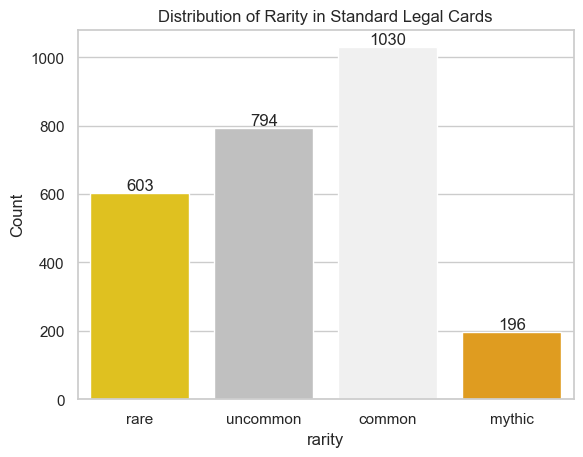

In [656]:
# Count of each rarity
custom_palette = {
    'common': '#F0F0F0',
    'uncommon': 'silver',
    'mythic': 'orange',
    'rare': 'gold'
}

ax = sns.countplot(x='rarity', palette=custom_palette, data=standard_legal_df)
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.title('Distribution of Rarity in Standard Legal Cards')
plt.show()


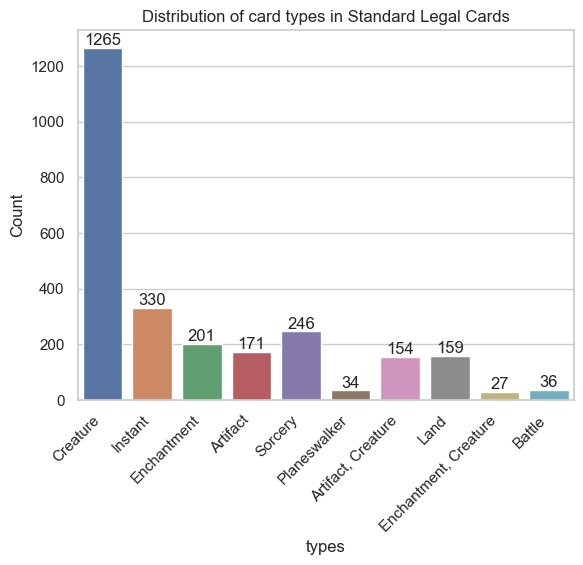

In [657]:
# Count of card types
ax = sns.countplot(x='types', data=standard_legal_df)
ax.bar_label(ax.containers[0])
plt.ylabel('Count')
plt.title('Distribution of card types in Standard Legal Cards')
plt.xticks(rotation=45, ha='right')
plt.show()


In [658]:
# Distirbution of Colors, nan color?
standard_legal_df['colors'].unique()


array(['W', 'U', 'B', 'R', 'G', 'R, W', 'R, U', 'G, R', 'B, U', 'B, W',
       'G, U', 'G, W', 'U, W', 'B, G', 'B, R', nan, 'R, U, W', 'B, R, W',
       'B, G, R, U, W', 'G, R, W', 'G, U, W', 'B, R, U', 'B, G, R',
       'B, U, W', 'B, G, U, W', 'G, R, U', 'B, G, W', 'B, G, U',
       'U, R, G'], dtype=object)

In [659]:
# Nan color seems to be colorless cards and lands
null_color_df = standard_legal_df[standard_legal_df['colors'].isnull()]
null_color_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
259,The Celestus,Artifact,NaN,NaN,NaN,{3},3.0,rare,MID,bc06cbe5-e4ff-54d9-b504-a5c7b3333124
260,Crossroads Candleguide,"Artifact, Creature",NaN,3,4,{4},4.0,common,MID,141d1f58-946a-5630-bdf1-9df88e80010e
261,Jack-o'-Lantern,Artifact,NaN,NaN,NaN,{1},1.0,common,MID,41faef03-46c3-5383-91af-1441066834ed
262,Moonsilver Key,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,b6b5758c-a97a-5b69-bc76-acc21b8aaf08
263,Mystic Skull // Mystic Monstrosity,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,ea6f4366-b2b0-5bd8-ac96-497f5d728053


In [660]:
# Create a data frame for lands
lands_df = standard_legal_df[standard_legal_df['types']=='Land'].copy()
lands_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
267,Deserted Beach,Land,NaN,NaN,NaN,NaN,0.0,rare,MID,351012c3-c774-5f06-8c0e-0f26017f011f
268,Evolving Wilds,Land,NaN,NaN,NaN,NaN,0.0,common,MID,ba05d48d-8b06-5598-8d61-971b6fa899ea
269,Field of Ruin,Land,NaN,NaN,NaN,NaN,0.0,uncommon,MID,9e79b341-6d00-55e0-be68-e6a748eadcbf
270,Haunted Ridge,Land,NaN,NaN,NaN,NaN,0.0,rare,MID,a014a45e-0f72-5ec4-bfd2-5afda91512ae
271,Hostile Hostel // Creeping Inn,Land,NaN,NaN,NaN,NaN,0.0,mythic,MID,f2aa39ee-e000-57d3-8e08-6db4b5114124


In [661]:
# Give lands the L color code
standard_legal_df.loc[standard_legal_df['types'] == 'Land', 'colors'] = 'L'
standard_legal_df[standard_legal_df['types']=='Land'].head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
267,Deserted Beach,Land,L,NaN,NaN,NaN,0.0,rare,MID,351012c3-c774-5f06-8c0e-0f26017f011f
268,Evolving Wilds,Land,L,NaN,NaN,NaN,0.0,common,MID,ba05d48d-8b06-5598-8d61-971b6fa899ea
269,Field of Ruin,Land,L,NaN,NaN,NaN,0.0,uncommon,MID,9e79b341-6d00-55e0-be68-e6a748eadcbf
270,Haunted Ridge,Land,L,NaN,NaN,NaN,0.0,rare,MID,a014a45e-0f72-5ec4-bfd2-5afda91512ae
271,Hostile Hostel // Creeping Inn,Land,L,NaN,NaN,NaN,0.0,mythic,MID,f2aa39ee-e000-57d3-8e08-6db4b5114124


In [662]:
# Create a data frame for all colorless cards which are not lands
colorless_cards_df = standard_legal_df[pd.isna(standard_legal_df['colors'])]
colorless_cards_df.head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
259,The Celestus,Artifact,NaN,NaN,NaN,{3},3.0,rare,MID,bc06cbe5-e4ff-54d9-b504-a5c7b3333124
260,Crossroads Candleguide,"Artifact, Creature",NaN,3,4,{4},4.0,common,MID,141d1f58-946a-5630-bdf1-9df88e80010e
261,Jack-o'-Lantern,Artifact,NaN,NaN,NaN,{1},1.0,common,MID,41faef03-46c3-5383-91af-1441066834ed
262,Moonsilver Key,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,b6b5758c-a97a-5b69-bc76-acc21b8aaf08
263,Mystic Skull // Mystic Monstrosity,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,ea6f4366-b2b0-5bd8-ac96-497f5d728053


In [663]:
# Replace the rest with C for colorless
standard_legal_df.loc[pd.isna(standard_legal_df['colors']), 'colors'] = 'C'
standard_legal_df[standard_legal_df['colors']=='C'].head(5)


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
259,The Celestus,Artifact,C,NaN,NaN,{3},3.0,rare,MID,bc06cbe5-e4ff-54d9-b504-a5c7b3333124
260,Crossroads Candleguide,"Artifact, Creature",C,3,4,{4},4.0,common,MID,141d1f58-946a-5630-bdf1-9df88e80010e
261,Jack-o'-Lantern,Artifact,C,NaN,NaN,{1},1.0,common,MID,41faef03-46c3-5383-91af-1441066834ed
262,Moonsilver Key,Artifact,C,NaN,NaN,{2},2.0,uncommon,MID,b6b5758c-a97a-5b69-bc76-acc21b8aaf08
263,Mystic Skull // Mystic Monstrosity,Artifact,C,NaN,NaN,{2},2.0,uncommon,MID,ea6f4366-b2b0-5bd8-ac96-497f5d728053


In [664]:
# All the unique colors and color combinations and there seems to be a duplicate combination
print(standard_legal_df['colors'].unique().tolist())
print(standard_legal_df['colors'].nunique())


['W', 'U', 'B', 'R', 'G', 'R, W', 'R, U', 'G, R', 'B, U', 'B, W', 'G, U', 'G, W', 'U, W', 'B, G', 'B, R', 'C', 'L', 'R, U, W', 'B, R, W', 'B, G, R, U, W', 'G, R, W', 'G, U, W', 'B, R, U', 'B, G, R', 'B, U, W', 'B, G, U, W', 'G, R, U', 'B, G, W', 'B, G, U', 'U, R, G']
30


In [665]:
standard_legal_df[standard_legal_df['colors']=='U, R, G']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
2565,Beluna Grandsquall // Seek Thrills,Creature,"U, R, G",4,4,{G}{U}{R},3.0,mythic,WOE,ac11ebbb-d5c6-5214-8a17-e2924415430a


In [666]:
standard_legal_df[standard_legal_df['colors']=='G, R, U']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
2218,Borborygmos and Fblthp,Creature,"G, R, U",6,5,{2}{G}{U}{R},5.0,mythic,MOM,4ecf9f14-5822-5de8-a2dd-5da5402e547b


In [667]:
standard_legal_df.loc[standard_legal_df['name'] == 'Beluna Grandsquall // Seek Thrills', 'colors'] = 'G, R, U'
standard_legal_df[standard_legal_df['colors']=='G, R, U']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
2218,Borborygmos and Fblthp,Creature,"G, R, U",6,5,{2}{G}{U}{R},5.0,mythic,MOM,4ecf9f14-5822-5de8-a2dd-5da5402e547b
2565,Beluna Grandsquall // Seek Thrills,Creature,"G, R, U",4,4,{G}{U}{R},3.0,mythic,WOE,ac11ebbb-d5c6-5214-8a17-e2924415430a


In [668]:
standard_legal_df[standard_legal_df['colors']=='B, G, R, U, W']


,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid
802,The Kami War // O-Kagachi Made Manifest,Enchantment,"B, G, R, U, W",NaN,NaN,{1}{W}{U}{B}{R}{G},6.0,mythic,NEO,5760a74f-8685-58df-9ec5-74a28e17b372
1101,Meeting of the Five,Sorcery,"B, G, R, U, W",NaN,NaN,{3}{W}{U}{B}{R}{G},8.0,mythic,SNC,fd8a29d1-e9f1-5f5b-ae92-af45cb362977
1379,"Jodah, the Unifier",Creature,"B, G, R, U, W",5,5,{W}{U}{B}{R}{G},5.0,mythic,DMU,04fae974-50e6-55e2-b05b-a0302b35fc8d
2229,Invasion of Alara // Awaken the Maelstrom,Battle,"B, G, R, U, W",NaN,NaN,{W}{U}{B}{R}{G},5.0,rare,MOM,60f7db0d-743f-59a4-b62f-16cef07ef47f
2248,"Omnath, Locus of All",Creature,"B, G, R, U, W",4,4,{W}{U}{B/P}{R}{G},5.0,rare,MOM,77ff02da-e3e9-5df5-a342-994ac785cfad
2335,"Niv-Mizzet, Supreme",Creature,"B, G, R, U, W",5,5,{W}{U}{B}{R}{G},5.0,rare,MAT,58b7a3d3-14de-5504-90c8-8d33ed7c2f1c


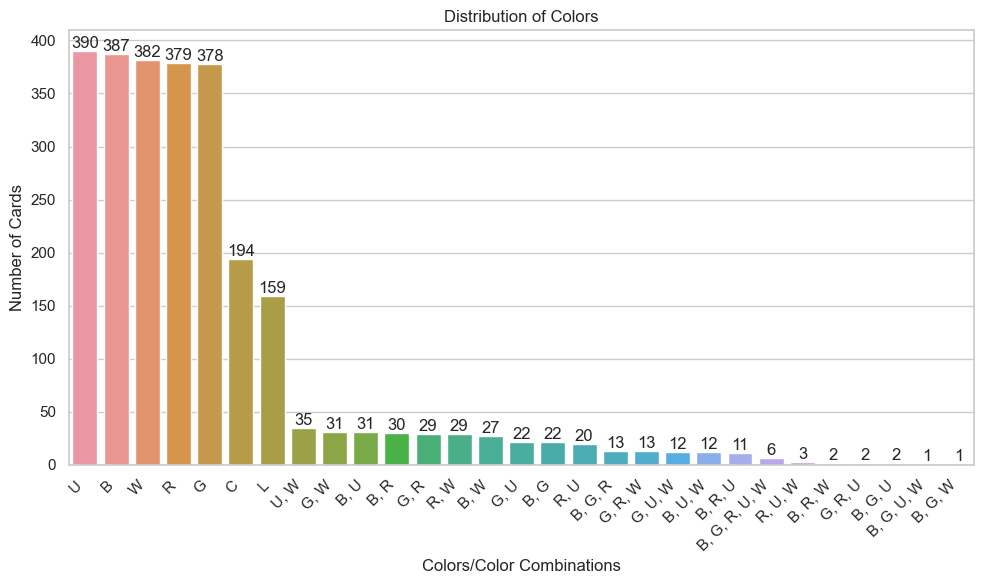

In [669]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x=standard_legal_df['colors'], order=standard_legal_df['colors'].value_counts().index)
ax.bar_label(ax.containers[0])

plt.xticks(rotation=45, ha='right')
plt.xlabel('Colors/Color Combinations')
plt.ylabel('Number of Cards')
plt.title('Distribution of Colors')

plt.tight_layout()
plt.show()


## Clean the Price df

In [689]:
# prices for adeline and confirming that I can merge with other dfs based on uuid
price_df[price_df['uuid'] == 'ac11ebbb-d5c6-5214-8a17-e2924415430a']


,cardFinish,date,uuid,price_usd
406667,normal,2023-10-22,ac11ebbb-d5c6-5214-8a17-e2924415430a,0.680
406668,foil,2023-10-22,ac11ebbb-d5c6-5214-8a17-e2924415430a,0.800
406669,normal,2023-10-22,ac11ebbb-d5c6-5214-8a17-e2924415430a,0.590
406670,foil,2023-10-22,ac11ebbb-d5c6-5214-8a17-e2924415430a,0.708
406673,normal,2023-10-22,ac11ebbb-d5c6-5214-8a17-e2924415430a,0.990
406674,foil,2023-10-22,ac11ebbb-d5c6-5214-8a17-e2924415430a,1.490
406675,normal,2023-10-22,ac11ebbb-d5c6-5214-8a17-e2924415430a,0.920


In [671]:
# Check kinds of currency in the data frame
price_df.currency.unique()


array(['USD', 'EUR'], dtype=object)

In [672]:
# Euro price percnetage
len(price_df[price_df['currency']=='EUR'])/len(price_df['price'])


0.18032090681656732

In [673]:
conversion_rates = {
    'EUR': 1.18
}
price_df['price_usd'] = price_df.apply(lambda row: row['price'] * conversion_rates[row['currency']]
                                       if row['currency'] == 'EUR' else row['price'], axis=1)


In [674]:
# Price df where all prices are USD
price_df.drop(columns=['currency', 'price'])


,cardFinish,date,gameAvailability,priceProvider,providerListing,uuid,price_usd
0,normal,2023-10-22,mtgo,cardhoarder,retail,f182e364-0439-5594-a6e6-75f7889ccf45,0.07
1,normal,2023-10-22,mtgo,cardhoarder,retail,330deaa3-dd7a-52a8-bfbc-b323cd16a409,0.23
2,normal,2023-10-22,mtgo,cardhoarder,retail,79e36956-b91f-580f-8309-7d9585a67560,0.02
3,normal,2023-10-22,mtgo,cardhoarder,retail,6afb2b4c-530a-57d5-8e7f-871239f6fa05,0.15
4,normal,2023-10-22,mtgo,cardhoarder,retail,b1fc2762-92aa-5a14-8509-a59cb611e376,0.02
...,...,...,...,...,...,...,...
647535,normal,2023-10-22,paper,cardsphere,retail,172a10dc-1b3d-5d24-b312-89fe2387a81e,650.07
647536,normal,2023-10-22,paper,cardsphere,retail,c04b97ec-5f88-5709-992b-486303835d3d,33.99
647537,normal,2023-10-22,paper,cardsphere,retail,a0400e83-f5b3-5353-ba4b-23faad67e4db,5.56
647538,normal,2023-10-22,paper,cardsphere,retail,5726ee7a-7b47-5735-8c75-7a5d4d68df1d,9.78


In [675]:
# Find out all forms of availability
price_df['gameAvailability'].value_counts()


paper    582564
mtgo      64976
Name: gameAvailability, dtype: int64

In [676]:
# All I want are paper forms, remove all mtgo prices
price_df = price_df[price_df['gameAvailability'] != 'mtgo']
price_df['gameAvailability'].value_counts()


paper    582564
Name: gameAvailability, dtype: int64

In [677]:
# Query for all forms of listings
price_df['providerListing'].value_counts()


retail     402907
buylist    179657
Name: providerListing, dtype: int64

In [678]:
# Remove buylists as it may not be very helpful to base my predictions on predictions
price_df = price_df[price_df['providerListing'] != 'buylist']
price_df['providerListing'].value_counts()


retail    402907
Name: providerListing, dtype: int64

In [679]:
# drop all the columns as I intend to use the mean prices for each id
price_df = price_df.drop(columns=['priceProvider', 'providerListing', 'gameAvailability', 'currency', 'price']).copy()
price_df


,cardFinish,date,uuid,price_usd
74,normal,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,6.6700
75,foil,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,30.1800
76,normal,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,3.1978
77,foil,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,15.1630
80,normal,2023-10-22,afc52162-e37d-5645-ac1b-06b814d61c48,4.9900
...,...,...,...,...
647535,normal,2023-10-22,172a10dc-1b3d-5d24-b312-89fe2387a81e,650.0700
647536,normal,2023-10-22,c04b97ec-5f88-5709-992b-486303835d3d,33.9900
647537,normal,2023-10-22,a0400e83-f5b3-5353-ba4b-23faad67e4db,5.5600
647538,normal,2023-10-22,5726ee7a-7b47-5735-8c75-7a5d4d68df1d,9.7800


In [680]:
# Get all card ids for the standard legal cards
legal_ids = standard_legal_df['uuid'].values


In [681]:
# Price df for legal cards
legal_price_df = price_df[price_df['uuid'].isin(legal_ids)]
legal_price_df


,cardFinish,date,uuid,price_usd
326102,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,8.7800
326103,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.1200
326104,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,12.4962
326105,foil,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,16.4610
326108,normal,2023-10-22,f10c65cc-1a64-552e-b53c-f825ca89d5eb,11.9900
...,...,...,...,...
647237,foil,2023-10-22,286fd366-82c8-5948-8101-d10bcf67fbf1,3.8350
647238,normal,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.8410
647239,foil,2023-10-22,a36682d1-8f05-5039-a892-9ce0072591cf,5.9000
647240,normal,2023-10-22,8736023c-a553-572a-a00c-07fca44030a8,2.0532


In [682]:
print(f"number of unique ids in the new priced_df: {legal_price_df['uuid'].nunique()}")
print(f"number of unique ids in the legal set: {standard_legal_df['uuid'].nunique()}")


number of unique ids in the new priced_df: 2542
number of unique ids in the legal set: 2623


This means I have lost a few cards in the process, so I took a different approach.

In [704]:
# Create a legal id data frame to be merged to the price df
legal_id_df = pd.DataFrame({'uuid': legal_ids})
legal_id_df


,uuid
0,f10c65cc-1a64-552e-b53c-f825ca89d5eb
1,cf968d16-027f-5970-a3a3-cb2f49e8dca0
2,13d054c7-4c25-5425-8b39-01fed17ebca1
3,295b974a-b0ee-59f3-829e-6f9912c9c9b7
4,87f85d5d-834c-589d-9738-1983bba0ded8
...,...
2618,2d2dc7fe-461a-5624-905b-216b43f63644
2619,e1a431ee-d95b-521b-9429-63885fab45a1
2620,6141fd5d-4051-530e-850c-e35a82c990a1
2621,f5c9b1a7-3c21-51e5-a15b-0278d9f748e5


In [686]:
# I do not have prices for all stnadard cards again
Legal_price_df = pd.merge(legal_id_df, price_df, on='uuid', how='inner')
Legal_price_df['uuid'].nunique()


2542

In [707]:
# Check if any of the legal ids are duplicated
standard_legal_df['uuid'].duplicated().value_counts()


False    2623
Name: uuid, dtype: int64